<a href="https://colab.research.google.com/github/gaurav91022/Sparks-Foundation/blob/main/Sparks_foundation_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task : Prediction using Supervised ML**

*By : Gaurav Soni*

## Problem Statement
Given data shows how much candidates scored if they have studied for some fixed Hours!

Task : We are supposed to calculate the predicted score, if the candidate studies for 9.5hr !!


## Imports
Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline (To makes the plots generated by matplotlib show into the IPython shell that we are running and not in a separate output window )

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

Data available online, by accessing the link.
* Hours : Total Hours student studied.
* Scores : What's the students score is!

**Reading the URL file as a DataFrame called Stu_Data.**

In [2]:
Url = "http://bit.ly/w-data"
Stu_Data = pd.read_csv(Url)

**Check the head of Stu_Data, and check out its info() and describe() methods.**

In [3]:
Stu_Data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
Stu_Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
Stu_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## Exploratory Data Analysis

**Let's explore the data!**

Here we'll using 
the numerical data of the csv file.

Adding style to improve plot view. 
___
**Using seaborn to create a jointplot to compare the time spent on studies and score secured.**

In [6]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

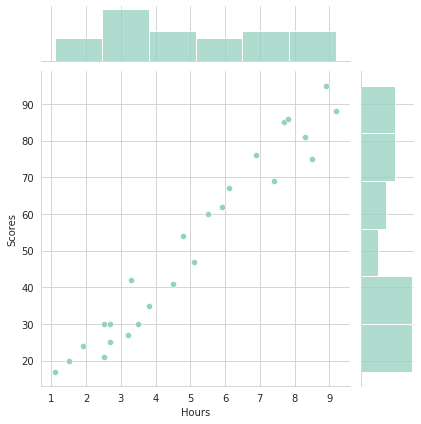

In [7]:
# More time on site, more money spent.
sns.jointplot(x='Hours',y='Scores',data=Stu_Data)

**Using jointplot to create a 2D hex bin plot comparing hours spent and score secured.**

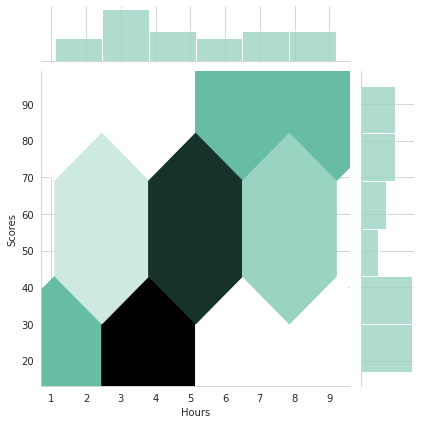

In [8]:
sns.jointplot(x='Hours',y='Scores',kind='hex',data=Stu_Data)

**Let's explore these types of relationships across the entire data set. Using [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.**

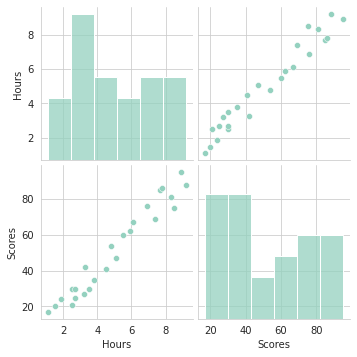

In [9]:
sns.pairplot(Stu_Data)

**Creating bold text a linear model plot (using seaborn's lmplot) of hours spent on reading V/S Score secured.**

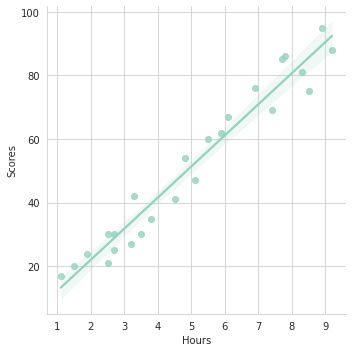

In [10]:
sns.lmplot(x='Hours',y='Scores',data=Stu_Data)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
**Set a variable X equal to the hours spent on learning and a variable y equal to the Score secured column**

In [12]:
y = Stu_Data.iloc[:, 1].values  

In [13]:
X = Stu_Data.iloc[:, :-1].values  

**Using model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.2 and random_state=101**

In [24]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Training the Model

Now its time to train our model on our training data!

* Import LinearRegression from sklearn.linear_model 

In [16]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [17]:
lm = LinearRegression()

**Train/fit lm on the training data.**

In [18]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

This represents the slope of score v/s hour line. 

In [19]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [9.73330705]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

**Use lm.predict() to predict off the X_test set of the data.**

In [20]:
predictions = lm.predict( X_test)

**Create a scatterplot of the real test values versus the predicted values.**

Text(0, 0.5, 'Predicted Y')

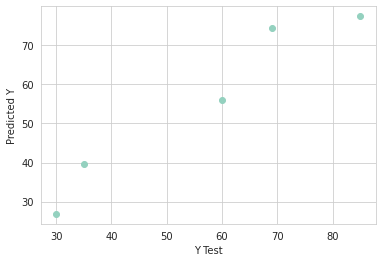

In [21]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

**Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.**

In [29]:
from sklearn import metrics

**Mean Absolute Error** 

* This is almost same to Mean Square Error metric but only MAE take absolute error value instead of square of predicted error for avoiding negative score .


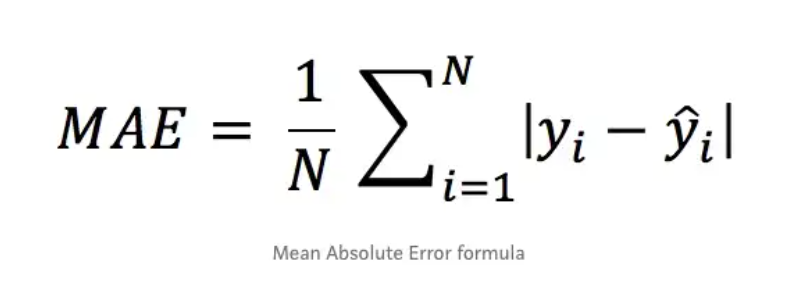


In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 4.937597792467706


**Mean Squared Error**

* MSE is calculated by sum of square of prediction error.
*  It’s result gives us how much deviation from actual number.

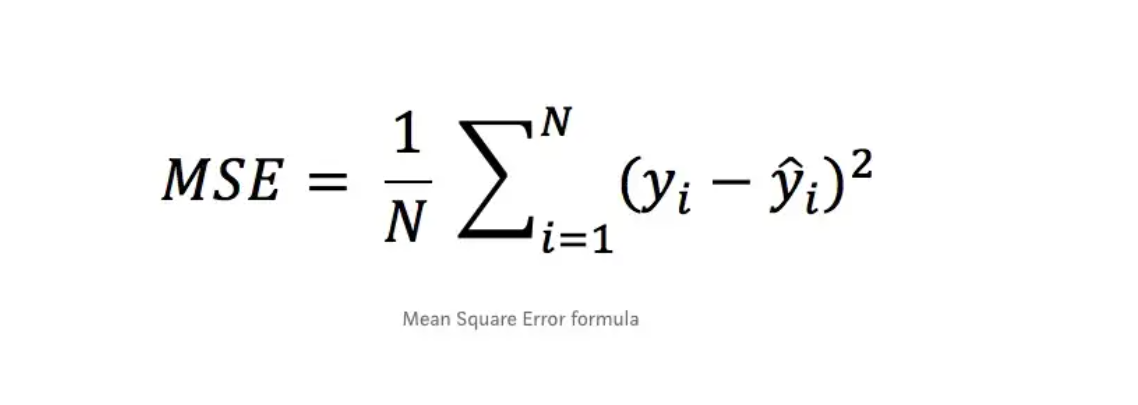

In [31]:
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MSE: 26.675642597052256
RMSE: 5.164846812544614


## Residuals

Let's quickly explore the residuals to make sure everything was okay with our data. 

**Ploting a histogram of the residuals to insure it looks normally distributed.**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


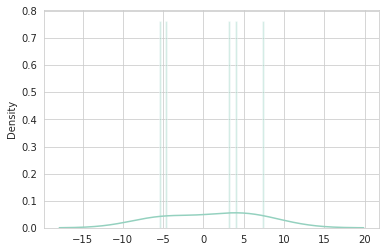

In [23]:
sns.distplot((y_test-predictions),bins=50);

**Predicting the Required result**!!


In [26]:
print(X_test) # Testing data - In Hours
y_pred =lm.predict(X_test) # Predicting the scores

[[2.5]
 [7.7]
 [3.8]
 [7.4]
 [5.5]]


In [27]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,30,26.845397
1,85,77.458594
2,35,39.498696
3,69,74.538601
4,60,56.045318


In [28]:
# You can also test with your own data
Target_Hours = 9.25
hours = [[9.25]]
own_pred = lm.predict(hours)
print("No of Hours = {}".format(Target_Hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.54521954029958


Finally we can conclude if the candidate studies for 9.25 hours, then his/her predicted score will be around 92.54.

**The End!**

